# Sensitivity study: PCA


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report

import sys
#sys.path.insert(0,'../')
from helper import (classification_tools as ct,
                   visualize as vis)
%matplotlib inline

In [3]:
fc1_path = Path('data','features','VGG16_fc1_features_std.pickle')
with open(fc1_path, 'rb') as f:
    data = pickle.load(f)

le_path = Path('models','label_encoder.pickle')
with open(le_path, 'rb') as f:
    le = pickle.load(f)

In [4]:
files = data['filename']
fc1 = data['features']
labels = data['labels']
y_gt = le.transform(labels)

In [5]:
pca = PCA(n_components=50, svd_solver='full', whiten=True)
pca_nw = PCA(n_components=50, svd_solver='full', whiten=False)
x = pca.fit_transform(fc1)
x_nw = pca_nw.fit_transform(fc1)

In [6]:
tsne = TSNE(n_components=2, random_state=12214)
tsne_w = TSNE(n_components=2, random_state=654753)
x_nw_tsne = tsne.fit_transform(x_nw)
x_w_tsne = tsne_w.fit_transform(x)

C:\Users\91800\anaconda3\envs\MTP\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91800\anaconda3\envs\MTP\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\91800\anaconda3\envs\MTP\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91800\anaconda3\envs\MTP\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
rs = np.random.RandomState(seed=1115068143)
for i, seed in enumerate(rs.randint(2**16,size=5), start=1):
    kmeans = KMeans(n_clusters=7, init='k-means++', n_init=50, random_state=seed)
    kmeans.fit(x_nw)
    labels_unmatched = kmeans.labels_
    y_pred = ct.label_matcher(labels_unmatched, y_gt)
    print('trial {}'.format(i))
    print('inertia: {:.2f}'.format(kmeans.inertia_))
    CM = confusion_matrix(y_gt, y_pred)
    print(CM)
    print('Accuracy: {:.3f}\n'.format(CM.trace()/CM.sum()))

trial 1
inertia: 6732731.50
[[299   1   0   0   0   0]
 [  0 275   0  19   4   2]
 [ 10   5 278   4   3   0]
 [  4   4   1 291   0   0]
 [  0   0   0   0 300   0]
 [  0   6   0   2   0 292]]
Accuracy: 0.964

trial 2
inertia: 6732731.50
[[299   1   0   0   0   0]
 [  0 275   0  19   4   2]
 [ 10   5 278   4   3   0]
 [  4   4   1 291   0   0]
 [  0   0   0   0 300   0]
 [  0   6   0   2   0 292]]
Accuracy: 0.964

trial 3
inertia: 6732731.50
[[299   1   0   0   0   0]
 [  0 275   0  19   4   2]
 [ 10   5 278   4   3   0]
 [  4   4   1 291   0   0]
 [  0   0   0   0 300   0]
 [  0   6   0   2   0 292]]
Accuracy: 0.964

trial 4
inertia: 6732731.50
[[299   1   0   0   0   0]
 [  0 275   0  19   4   2]
 [ 10   5 278   4   3   0]
 [  4   4   1 291   0   0]
 [  0   0   0   0 300   0]
 [  0   6   0   2   0 292]]
Accuracy: 0.964

trial 5
inertia: 6732731.50
[[299   1   0   0   0   0]
 [  0 275   0  19   4   2]
 [ 10   5 278   4   3   0]
 [  4   4   1 291   0   0]
 [  0   0   0   0 300   0]
 [  0

In [8]:
pca_nw = PCA(whiten=False, svd_solver='full')
pca_w = PCA(whiten=True, svd_solver='full')

pca_nw.fit(fc1)
pca_w.fit(fc1)

PCA(svd_solver='full', whiten=True)

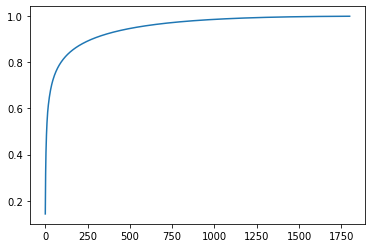

In [9]:
var = pca_w.explained_variance_ratio_.astype(np.float64).cumsum()
plt.plot(var)

In [10]:
nc = [1, 5, 10, 20, 50, 100, 250, 500, 1000, 1800] 
for n, v in zip(nc, var[np.asarray(nc)-1]):
    print('number of components: {}\ntotal fraction of variance: {:.3f}\n'.format(n, v))

number of components: 1
total fraction of variance: 0.143

number of components: 5
total fraction of variance: 0.407

number of components: 10
total fraction of variance: 0.523

number of components: 20
total fraction of variance: 0.621

number of components: 50
total fraction of variance: 0.733

number of components: 100
total fraction of variance: 0.807

number of components: 250
total fraction of variance: 0.892

number of components: 500
total fraction of variance: 0.947

number of components: 1000
total fraction of variance: 0.986

number of components: 1800
total fraction of variance: 1.000



In [13]:
use_cache = True # set to False to re-compute results
pca_nc_cache_path = Path('.neu_cache','sensitivity_pca_num_components.pickle')

if not use_cache or not pca_nc_cache_path.is_file(): # run if user specifies (switch=True) or if cached results not found
    accs_w = []
    accs_nw = []
    rs = np.random.RandomState(seed=3731806785)
    for c, seed1, seed2  in zip(nc, 
                                rs.randint(2**16, size=len(nc)), 
                                rs.randint(2**16, size=len(nc))):

        print('number of components: {:>4}'.format(c))
        pca_nw = PCA(whiten=False, svd_solver='full', n_components=c)
        pca_w = PCA(whiten=True, svd_solver='full', n_components=c)

        x_nw = pca_nw.fit_transform(fc1)
        x_w = pca_w.fit_transform(fc1)

        kmeans_nw = KMeans(n_clusters=7, init='k-means++', n_init=500, random_state=seed1)
        kmeans_nw.fit(x_nw)
        labels_unmatched_nw = kmeans_nw.labels_
        y_pred_nw  = ct.label_matcher(labels_unmatched_nw, y_gt)

        CM_nw = confusion_matrix(y_gt, y_pred_nw)
        accs_nw.append(CM_nw.trace()/CM_nw.sum())

        kmeans_w = KMeans(n_clusters=7, init='k-means++', n_init=500, random_state=seed2)
        kmeans_w.fit(x_w)
        labels_unmatched_w = kmeans_w.labels_
        y_pred_w  = ct.label_matcher(labels_unmatched_w, y_gt,)


        CM_w = confusion_matrix(y_gt, y_pred_w)
        accs_w.append(CM_w.trace()/CM_w.sum())
    with open(pca_nc_cache_path, 'wb') as f:
        pickle.dump({'nc':nc,
                'accs_nw':accs_nw,
                'accs_w':accs_w},
               f)
else:
    with open(pca_nc_cache_path, 'rb') as f:
        results_ = pickle.load(f)
        nc = results_['nc']
        accs_nw = results_['accs_nw']
        accs_w = results_['accs_w']

number of components:    1
number of components:    5
number of components:   10
number of components:   20
number of components:   50
number of components:  100
number of components:  250
number of components:  500
number of components: 1000
number of components: 1800


C:\Users\91800\AppData\Local\Temp\ipykernel_25972\3245240307.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-.sk" (-> color='k'). The keyword argument will take precedence.
  ax.plot(nc, accs_w, '-.sk', label='whitening', color='deeppink')
C:\Users\91800\AppData\Local\Temp\ipykernel_25972\3245240307.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  ax.plot(nc, accs_nw, ':ok', label='no whitening', color='slateblue')


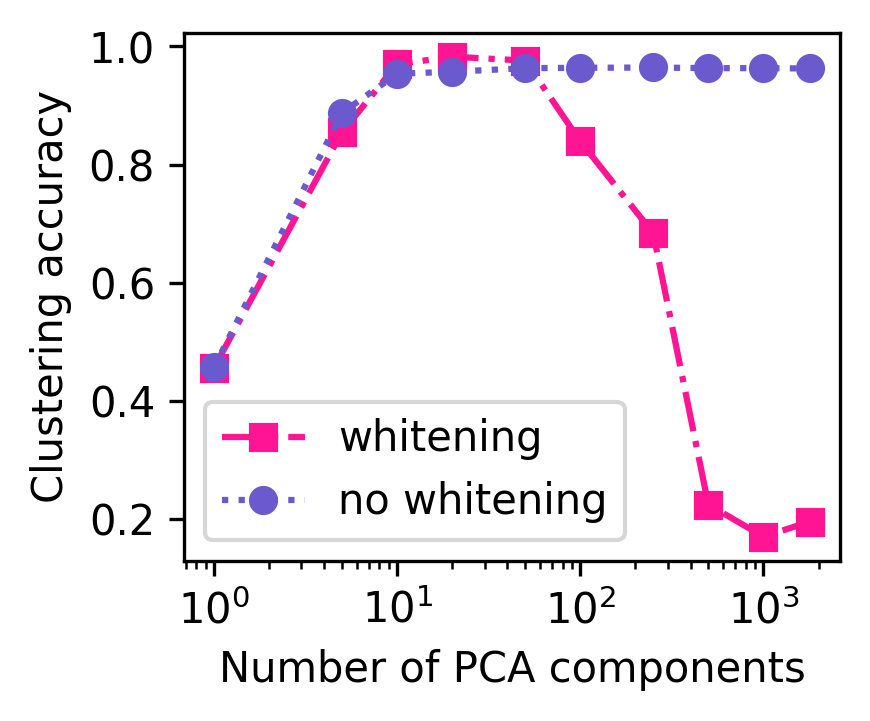

In [14]:
fig = plt.figure(dpi=300, figsize=(3,2.5))
ax = fig.add_subplot(111)
ax.plot(nc, accs_w, '-.sk', label='whitening', color='deeppink')
ax.plot(nc, accs_nw, ':ok', label='no whitening', color='slateblue')
leg = ax.legend()
ax.set_xscale('log')
ax.set_xlabel('Number of PCA components')
ax.set_ylabel('Clustering accuracy')
fig.tight_layout()
fig.savefig(Path('Figures','pca_n_components.png'), bbox_inches='tight')

In [15]:
print('number of components\taccuaries (no whitening)\taccuracies (whitening)')
for n, nw, w in zip(nc, accs_nw, accs_w):
    print('\t{:>4}\t\t\t{:.3f}\t\t\t\t{:.3f}'.format(n,nw,w))

number of components	accuaries (no whitening)	accuracies (whitening)
	   1			0.457				0.456
	   5			0.888				0.855
	  10			0.954				0.970
	  20			0.957				0.983
	  50			0.963				0.976
	 100			0.964				0.839
	 250			0.964				0.684
	 500			0.963				0.224
	1000			0.963				0.170
	1800			0.963				0.196
